# Titanic Data set

The titanic dataset has data on the passengers of the Titanic catastrophe and whether they had survived the event or not. We have 2 sets of data: a training set and a testing set.

These are the columns of the dataset:

- PassengerId: Passenger ID
- Pclass: Passenger Class
- Name: Name of passenger
- Sex: Sex of passenger
- Age: Age of passenger
- SibSp: Number of Siblings/Spouses of the passenger aboard
- Parch Number: of Parents/Children of the passenger aboard
- Ticket: Ticket Number
- Fare: Passenger Fare
- Cabin: Cabin
- Embarked: Port of Embarkation

The goal is to predict whether a passenger has survived or not


## 1- Import Libraries

We first import a list of libraries we will be using

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ignore warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 2- Load the Data

We load the titanic data from csv files.

In [3]:
titanicTrain = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

## 3- EDA

Check to see what the titanic dataset looks like

In [4]:
titanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Create a dataframe for EDA purposes
titanicEDA =titanicTrain.copy()

Check to see whether there are any correlations in the data. We can see that there are indeed some correlations. For example the Survived flag is correlated with Pclass and Fare

In [7]:
titanicEDA.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Check if there are any missing data and if so roughly how much

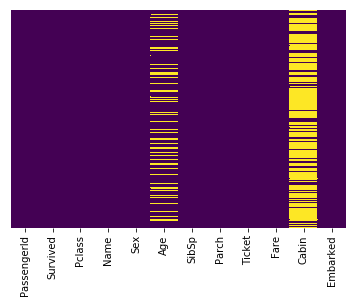

In [8]:
sns.heatmap(titanicEDA.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The test data is similar to the training data in that there are similar amounts of missing data

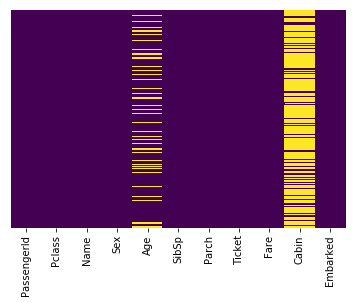

In [9]:
sns.heatmap(X_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
print("Percentage of Age == NaN values: ", 100*np.size(titanicEDA[pd.isnull(titanicEDA['Age'])]['Age'])/np.size(titanicEDA['Age']))
print("Percentage of Age == NaN values: ", 100*np.sum(pd.isnull(titanicEDA['Age']))/np.size(titanicEDA['Age']))
print("Percentage of Age == NaN values: ", 100*(1- titanicEDA['Age'].count()/np.size(titanicEDA['Age'])))

print("Percentage of Cabin == NaN values: ", 100*np.size(titanicEDA[pd.isnull(titanicEDA['Cabin'])]['Cabin'])/np.size(titanicEDA['Cabin']))
print("Percentage of Cabin == NaN values: ", 100*np.sum(pd.isnull(titanicEDA['Cabin']))/np.size(titanicEDA['Cabin']))
print("Percentage of Cabin == NaN values: ", 100*(1- titanicEDA['Cabin'].count()/np.size(titanicEDA['Cabin'])))

Percentage of Age == NaN values:  19.865319865319865
Percentage of Age == NaN values:  19.865319865319865
Percentage of Age == NaN values:  19.865319865319865
Percentage of Cabin == NaN values:  77.10437710437711
Percentage of Cabin == NaN values:  77.10437710437711
Percentage of Cabin == NaN values:  77.1043771043771


A big proportion of Cabin data is missing. Let's have a quick glance at some of the fields and their distributions

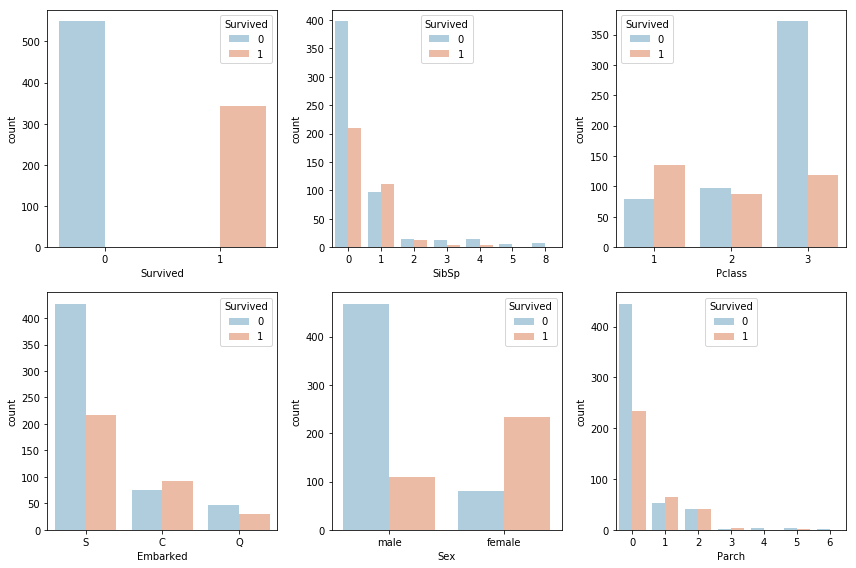

In [11]:
# The fields we want to look at
fields = ['Survived','SibSp','Pclass','Embarked','Sex','Parch']

nrows = 2
ncols = int(len(fields)/nrows)

fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols*4,nrows*4))

for row in range(0,nrows):
    for col in range(0,ncols):
        thisAxis = ax[row][col]
        field = row*ncols + col
        if field >= len(fields):
            continue
        sns.countplot(x=fields[field],hue=fields[0],data=titanicEDA,palette='RdBu_r',ax=thisAxis)
        
plt.tight_layout()   

We can obtain the following information from the above plots:

- More people died than survived
- Those in Pclass=3 had a much higher proportion of deaths
- Those that had Embarked = 'S' had a much greater death proportion
- Parch is a great indicator of whether the person has survived since a greater portion of those with Parch 0 died
- Women were much more likely to survive than men
- Parch is closely related to SibSp, both in meaning and in it's relation to survival

Outcome for the model:

- Add Pclass as a predictor
- Add Embarked as a predictor
- Add Parch and SibSp as a predictor (TotalPpl = Parch + SibSp)
- Add Sex as a predictor


Next, we check the distributions of some of the other fields

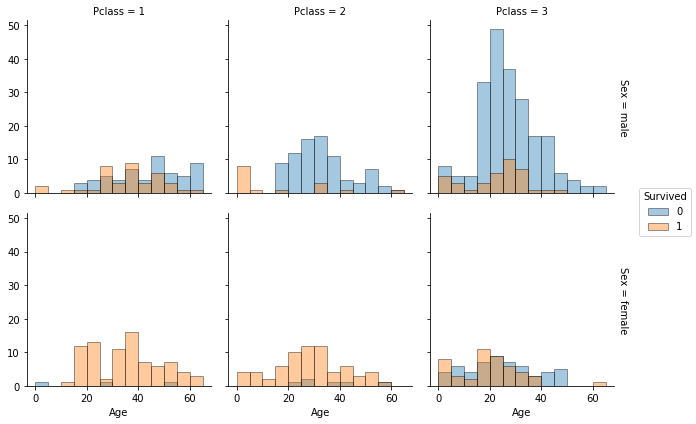

In [12]:
g = sns.FacetGrid(data=titanicEDA,row='Sex',col='Pclass',hue='Survived',margin_titles=True)

g.map(sns.distplot, 'Age', kde=False,bins=np.arange(0,70,5),hist_kws=dict(edgecolor='black'))

g.add_legend() 

plt.show()  

We can see from the above distributions that:

- Males had best survival rates in Pclass 1
- Females had best survival rates in Pclass 1 and 2
- For females, being very young in Pclass 1 meant you had greater chance of death. While being in Pclass 2 meant greater chance of survival

Outcome for the model:

- Add Age as a predictor

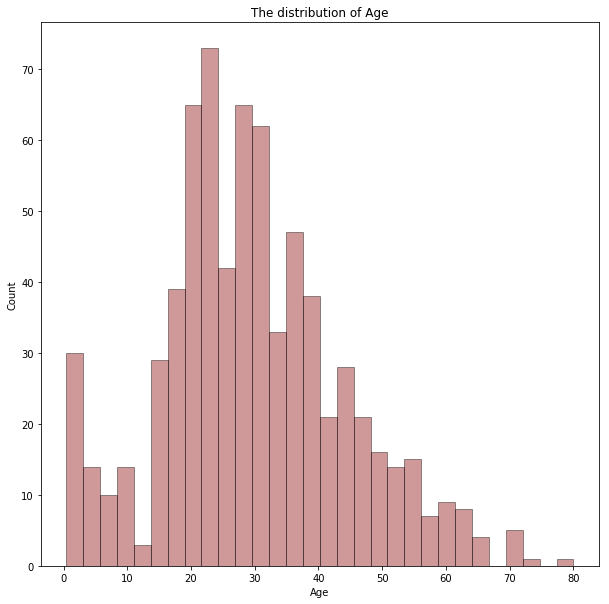

In [13]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

ax.set_ylabel('Count')
ax.set_title('The distribution of Age')

g = sns.distplot(titanicEDA['Age'].dropna(),kde=False,color='darkred',bins=30,hist_kws=dict(edgecolor='black'),ax=ax)

We can see that the distribution of Age is slightly bimodal. We have a small peak for the much younger age groups. Could possibly be due newly weds taking their young children along with them. Or it may be due to a very young child is pretty dependent and more difficult to leave in the care of another. Whatever the reason, we can see in the above Age distribution plot against survival that apart from a small anomaly in the female Pclass=1 subclass, very young children have pretty good survival rates compared to other age groups.

Let's have a look at similar information for Fare

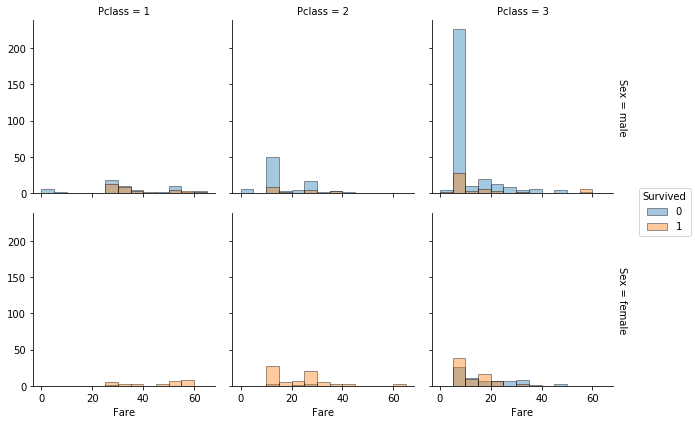

In [14]:
g = sns.FacetGrid(data=titanicEDA,row='Sex',col='Pclass',hue='Survived',margin_titles=True)

g.map(sns.distplot, 'Fare', kde=False,bins=np.arange(0,70,5),hist_kws=dict(edgecolor='black'))

g.add_legend() 

plt.show()  

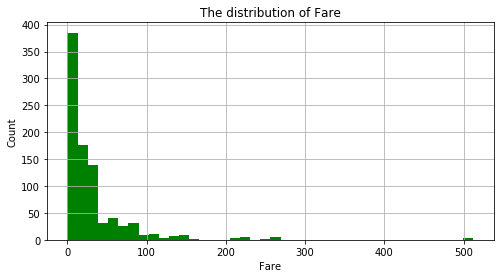

In [15]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

ax.set_ylabel('Count')
ax.set_xlabel('Fare')
ax.set_title('The distribution of Fare')

g = titanicEDA['Fare'].hist(color='green',bins=40,figsize=(8,4))

Fare is highly left skewed. It is clear that Pclass 3 and low fares had atrocious survival rates. We can ignore this class so that we can get a better look at the other classes below 

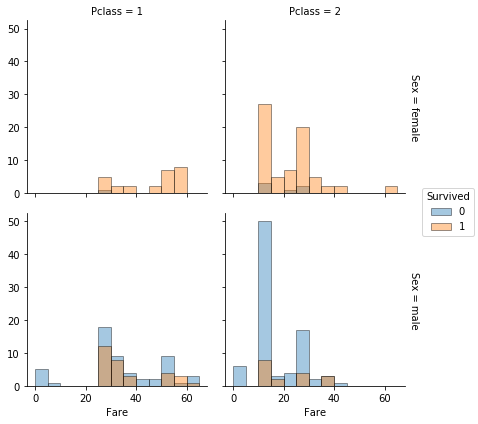

In [16]:
g = sns.FacetGrid(data=titanicEDA[titanicEDA['Pclass'] < 3],row='Sex',col='Pclass',hue='Survived',margin_titles=True)

g.map(sns.distplot, 'Fare', kde=False,bins=np.arange(0,70,5),hist_kws=dict(edgecolor='black'))

g.add_legend() 

plt.show()  

Looking further, we can see that a lower fare corresponds to a lower survival rate.

Let's create a TotalPpl column and see how that correlates with survival

In [17]:
titanicEDA['TotalPpl'] = titanicEDA['Parch'] + titanicEDA['SibSp']

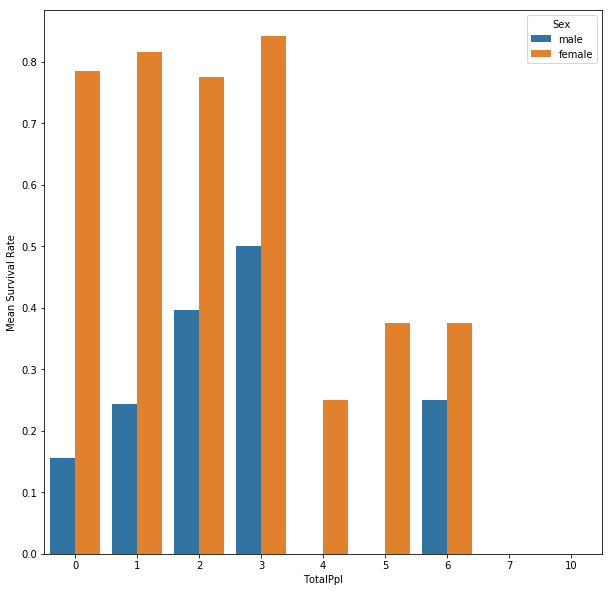

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='TotalPpl',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

When viewed all together, it looks like there is no relationship between TotalPpl and Survival. However, looking at this data split by gender shows that as the size of a passengers family increases toward 3, male passenger survival rates increase while female passenger survival rates remain constant. Increasing the family size further dramatically decreases survival rates.

Next, let's look at passenger titles to see if there is any insight there.

In [19]:
def getTitleFromTitanic(x):
    '''
    A function to extract the title from a passenger name
    x:= Name of passenger
    '''
    for elt in x.split():
        if('.' in elt):
            return elt.replace('.','')
    return ''

#Get the title from the name
titanicEDA['Title'] = titanicEDA['Name'].apply(getTitleFromTitanic)

dic_OrigMap = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master':'Master','Don':'Don','Rev':'Rev',
    'Mme':'Mme',
    'Ms':'Ms','Major':'Major', 'Lady':'Lady', 'Sir':'Sir', 'Mlle':'Mlle', 
    'Col':'Col', 'Capt':'Capt', 'Countess':'Countess','Jonkheer':'Jonkheer', 'Dr':'Dr', 'Dona':'Dona'}

dic_Map = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master':'Master','Don':'Mr','Rev':'Rev',
    'Mme':'Mrs',
    'Ms':'Ms','Major':'Mr', 'Lady':'Mrs', 'Sir':'Master', 'Mlle':'Miss', 
    'Col':'Col', 'Capt':'Rev', 'Countess':'Mrs','Jonkheer':'Master', 'Dr':'Dr', 'Dona':'Mrs'}

titanicEDA['Title'] = titanicEDA['Title'].map(dic_Map)

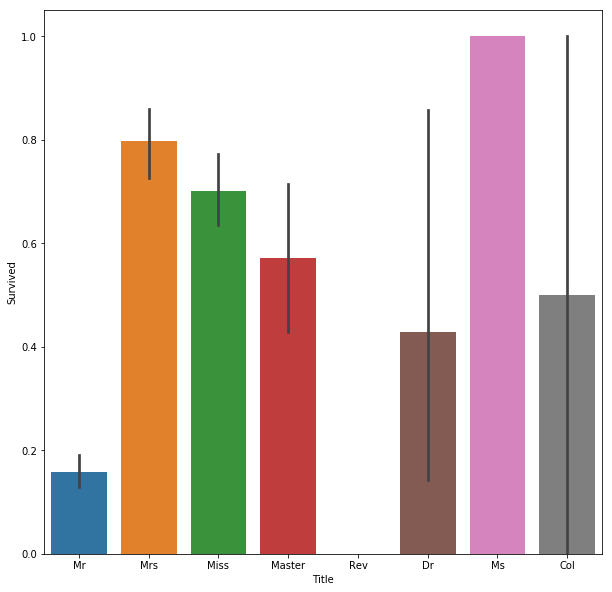

In [20]:
fig,ax = plt.subplots()
sns.barplot(x='Title',y='Survived',data=titanicEDA)
fig.set_size_inches(10,10)

The test set has the following titles:

'Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'

In [21]:
# titanicTestCleaned = fillTitanicNa(test,True,True)
# titanicTestCleaned.drop('PassengerId',inplace=True,axis=1)
# titanicTestCleaned.head()
# test['Title'].unique()

In [22]:
def GetTicketNo(x):
    a = x.split()
    n = len(a)
    if n == 1:
        if(a[0] != 'LINE'):
            return int(a[0])
        else:
            return 0
    else:
        return int(a[n-1])
    
def BucketTicketNo(x):
    if x < 10000:
        return 'l10'
    elif x < 40000:
        return 'l40'
    elif x < 110000:
        return 'l110'
    elif x < 260000:
        return 'l260'
    elif x < 330000:
        return 'l330'
    else:
        return 'g330'

#titanicEDA['TicketBucket'] = (titanicEDA['Ticket'].apply(GetTicketNo)).apply(lambda x: 'G200k' if x > 260000 else 'L200k')

titanicEDA['TicketBucket'] = (titanicEDA['Ticket'].apply(GetTicketNo)).apply(BucketTicketNo)

# Bucket them

#titanicEDA['TicketBucket'] = titanicEDA['Ticket No.'].apply(lambda x: 'G200k' if x > 200000 else 'L200k')
#tem = titanicEDA['Ticket'][170:175].apply(GetTicketNo)

In [23]:
#titanicEDA['TestTicketBucket'] = (titanicEDA['Ticket'].apply(GetTicketNo)).apply(lambda x: int(x/20000)*20000)

In [24]:
# titanicEDA[['Ticket No.','Ticket']]

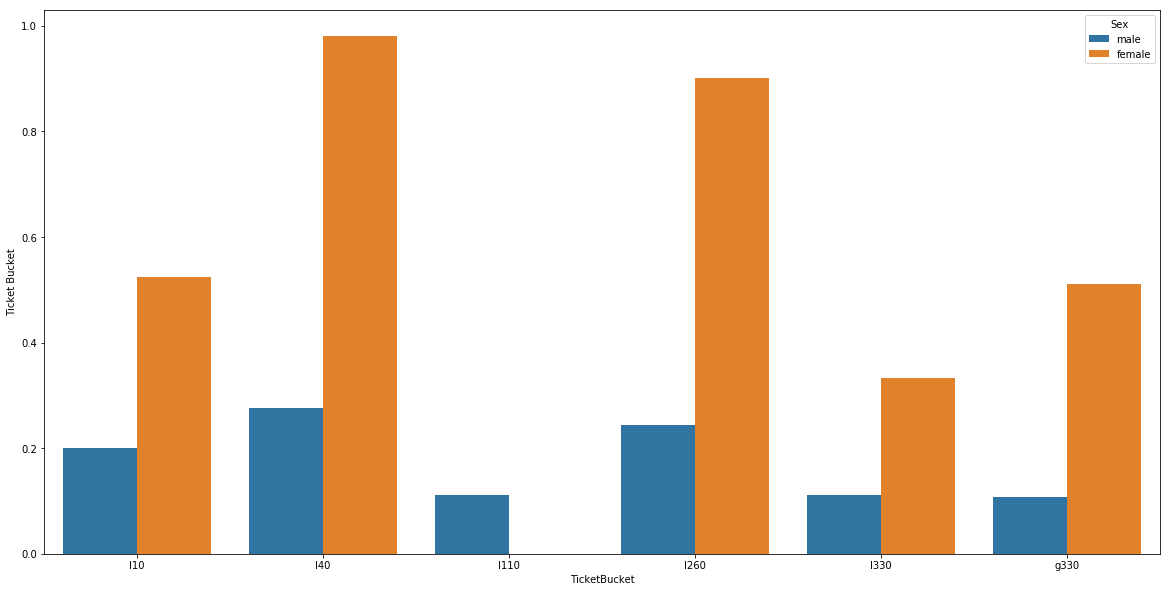

In [25]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,10))

sns.barplot(x='TicketBucket',y='Survived',hue='Sex',data=titanicEDA,ci=0,order=['l10','l40','l110','l260','l330','g330'])

ax.set_ylabel('Ticket Bucket')

plt.show()

 We can see that married females have a much higher rate of survival. How about the name length?

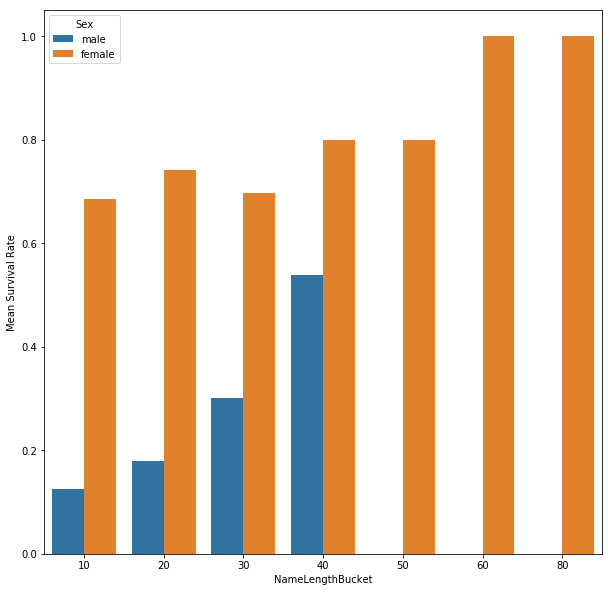

In [26]:
# Get the name lenth and bucket it
titanicEDA['NameLengthBucket'] = titanicEDA['Name'].apply(lambda x: int(len(x)/10)*10)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='NameLengthBucket',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

In [27]:
titanicEDA[['Survived','NameLengthBucket']].corr()

,Survived,NameLengthBucket
Survived,1.000000,0.327466
NameLengthBucket,0.327466,1.000000


In the above plot, we can see that a longer name corresponds to greater survival rate. We can also see from the above output that the name length is correlated with survival.
 
 Outcome for the model:
 
 - Add Title to the model
 - Add name length to the model
 
Next let's look at whether we can see anything interesting with the Cabin variable

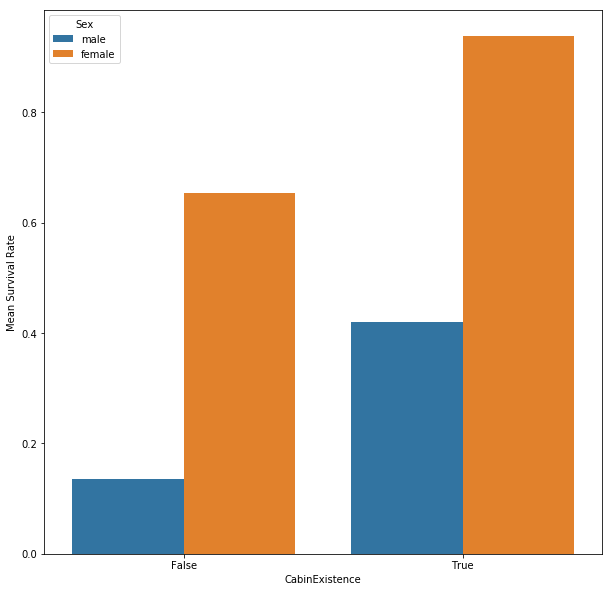

In [28]:
#Cabin either exists or doesn't -> 1 or 0
titanicEDA['CabinExistence'] = pd.isnull(titanicEDA['Cabin']).apply(lambda x: not x)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='CabinExistence',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

We can see that whether a cabin entry exists for a passenger gives us information about the survival rate for both genders.

Let's see if we can go further than this, for those that have a cabin entry, would the first letter of the cabin ID give us any further information?

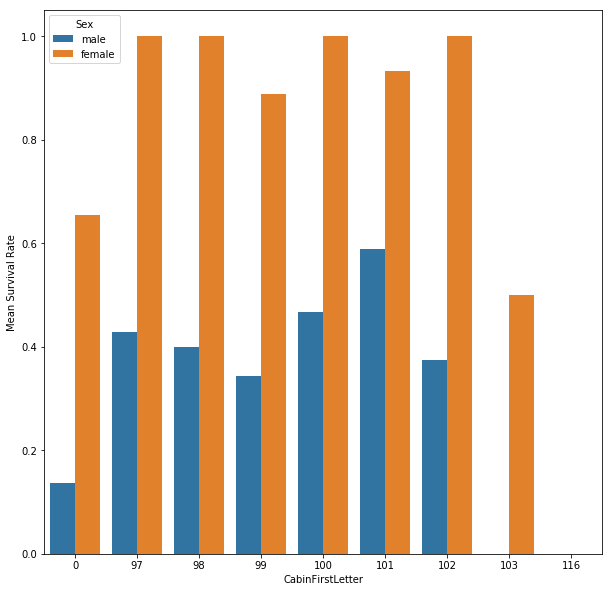

In [29]:
def GetFirstCharacter(st):
    '''
    A function to extract the first letter (lower case) from a string. If string is null then output is an empty string
    st: A string
    '''
    if(pd.isnull(st) or len(st)==0):
        return 0
    else:
        return ord(st[0].lower())

#Cabin first letter
titanicEDA['CabinFirstLetter'] = titanicEDA['Cabin'].apply(GetFirstCharacter)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='CabinFirstLetter',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

There doesn't seem to be anything we can obtain from the first letter of the cabin. How about the cabin name length?

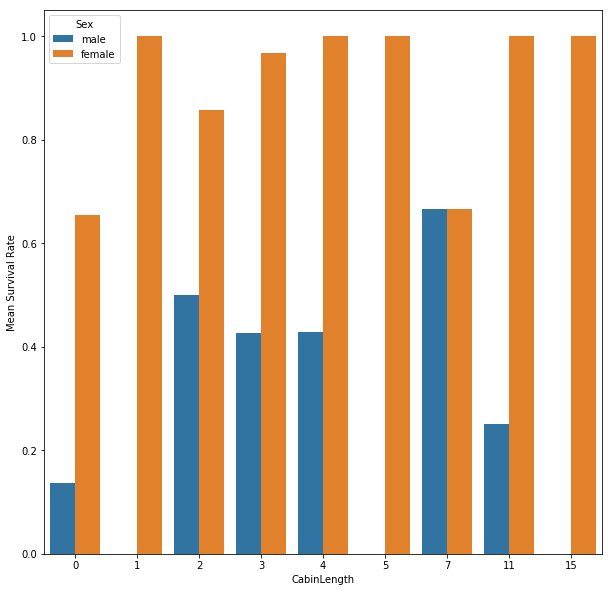

In [30]:
#Cabin first letter
titanicEDA['CabinLength'] = titanicEDA['Cabin'].apply(lambda x: 0 if str(x) == 'nan' else len(x))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='CabinLength',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

Cabin name length also doesn't seem to give us more information so we'll stick with cabin existence

Outcome for the model:
 
 - Add Cabin existence to the model

## 4- Transformation and Cleaning

As seen above, there is some missing data for Age. Also, the test data may have missing Fare. One way we can cater for this is to fill the missing Age with the mean of the Age for that sex and Pclass. We can do this in the below set of functions as well as do some cleaning and transformations we've identified above

In [31]:
def TrueFalse(p):
    '''A function to null to 0'''
    if(p):
        return 1
    else:
        return 0
    
def getTitleFromTitanic(x):
    '''
    A function to extract the title from a passenger name
    x:= Name of passenger
    '''
    for elt in x.split():
        if('.' in elt):
            return elt.replace('.','')
    return ''

def GetFirstCharacter(st):
    '''
    A function to extract the first letter (lower case) from a string. If string is null then output is an empty string
    st: A string
    '''
    if(pd.isnull(st) or len(st)==0):
        return 0
    else:
        return ord(st[0].lower())
    
def AddTotalPpl(df):
    df_temp = df.copy()
    df_temp['TotalPpl'] = df['Parch'] + df['SibSp']
    return df_temp

def CleanTitanicData(df):
    '''
    A function to clean the titanic dataframe according to the EDA above
    '''
    
    #Sex is either male or female. Create a series which has entries 0 and 1 specifying whether it's one or the other
    sex = pd.get_dummies(df['Sex'],drop_first=True)
    
    #Similar to the sex series
    embark = pd.get_dummies(df['Embarked'],drop_first=True)
    
    #Cabin either exists or doesn't -> 1 or 0
    Cabin = pd.DataFrame(pd.isnull(df['Cabin']).apply(lambda x: not x),columns=['Cabin'])
    
    # Get the ticket number and then bucket them into >200000 and < 200000
    df['TicketBucket'] = (df['Ticket'].apply(GetTicketNo)).apply(BucketTicketNo)
    TicketBucket = pd.get_dummies(df['TicketBucket'],drop_first=True)
    
    #Get first letter of cabin
    #Cabin = df['Cabin'].apply(GetFirstCharacter)
    
    #Get the title from the name
    df['Title'] = df['Name'].apply(getTitleFromTitanic)
    
    df['Title'] = df['Title'].map(dic_Map)
    
    Title =  pd.get_dummies(df['Title'],drop_first=True)
    
    # Get the name lenth and bucket it
    df['NameLengthBucket'] = df['Name'].apply(lambda x: int(len(x)/10)*10)
    
    #Get rid of some columns
    df_temp = df.drop(['Sex','Embarked','Name','Ticket','Cabin','Title','TicketBucket'],axis=1,inplace=False)
    
    #Concat the series to the data frame
    df_temp = pd.concat([df_temp,sex,embark,Cabin,Title,TicketBucket],axis=1)
    
    df_temp['TotalPpl'] = df['Parch'] + df['SibSp']
    
    return df_temp



Below, we will populate 'NA' values for fare and age with their corresponding mean values within their classes.

In [32]:
#We will put this block into a function below
t_Fare = pd.DataFrame(CleanTitanicData(titanicTrain).dropna().groupby(['Pclass','male','TotalPpl']).median()['Fare'])
t_Fare = pd.DataFrame(t_Fare.to_records())

t_Age = pd.DataFrame(CleanTitanicData(titanicTrain).dropna().groupby(['Pclass','male','TotalPpl']).median()['Age'])
t_Age = pd.DataFrame(t_Age.to_records())

print('Mean Fare per grouping \n',t_Fare,'\n\n')
print('Mean Age per grouping \n',t_Age)

Mean Fare per grouping 
     Pclass  male  TotalPpl       Fare
0        1     0         0   81.57915
1        1     0         1   77.95830
2        1     0         2   79.65000
3        1     0         3  135.77500
4        1     0         4  262.37500
5        1     0         5  263.00000
6        1     1         0   30.00000
7        1     1         1   63.35830
8        1     1         2   90.00000
9        1     1         3  120.00000
10       1     1         5  263.00000
11       2     0         0   13.00000
12       2     0         1   26.00000
13       2     0         2   26.25000
14       2     0         3   39.00000
15       2     0         4   23.00000
16       2     0         5   18.75000
17       2     1         0   13.00000
18       2     1         1   26.00000
19       2     1         2   29.00000
20       2     1         3   33.37500
21       3     0         0    7.85420
22       3     0         1   13.41670
23       3     0         2   16.70000
24       3     0         

We can create 2 functions to deal with this assignment of null values

In [33]:
def setAge(row,meanAge):
    '''
    This function is intended to be used via the apply() funtion and applies to rows in the format (Age,sex,Pclass).
    This function replaces any null Age with the mean Age of the same sex and Pclass as given in the meanAge argument/dataframe.
    '''
    Age = row[0]
    male = row[1]
    Pclass = row[2]
    TotalPpl = row[3]
    if(pd.isnull(Age) & (np.sum(meanAge['TotalPpl'] == TotalPpl) > 0)):
        return int(meanAge[(meanAge['Pclass'] == Pclass) & (meanAge['male'] == male) & (meanAge['TotalPpl'] == TotalPpl)]['Age'].iloc[0])
    elif(pd.isnull(Age)):
        return int(meanAge[(meanAge['Pclass'] == Pclass) & (meanAge['male'] == male)]['Age'].iloc[0])
    else:
        return int(Age)

In [34]:
def setFare(row,meanFare):
    '''
    This function is intended to be used via the apply() funtion and applies to rows in the format (Fare,sex,Pclass).
    This function replaces any null Fare with the mean Fare of the same sex and Pclass as given in the meanFare argument/dataframe.
    '''
    Fare = row[0]
    male = row[1]
    Pclass = row[2]
    TotalPpl = row[3]
    if(pd.isnull(Fare)  & (np.sum(meanFare['TotalPpl'] == TotalPpl) > 0)):
        return int(meanFare[(meanFare['Pclass'] == Pclass) & (meanFare['male'] == male) & (meanFare['TotalPpl'] == TotalPpl)]['Fare'].iloc[0])
    elif(pd.isnull(Fare)):
        return int(meanFare[(meanFare['Pclass'] == Pclass) & (meanFare['male'] == male)]['Fare'].iloc[0])
    else:
        return int(Fare)

Now we include the above functions, clean the data and fill missing values all in one function

In [35]:
def fillTitanicNa(df,trainingData,fillAge=True,fillFare=True):
    '''
    This function takes a titanic data frame, cleans it and fills in missing Age and Fare values. If it is desired
    that the Age not be filled the fillAge should be set to False. Likewise with fillFare.
    '''
    
    # Clean and transform the data
    df_temp = CleanTitanicData(df)
    df_train = CleanTitanicData(trainingData)

    # Get the mean Fare values per grouping
    t_Fare = pd.DataFrame(df_train.dropna().groupby(['Pclass','male','TotalPpl']).median()['Fare'])
    t_Fare = pd.DataFrame(t_Fare.to_records())

    # Get the mean Age values per grouping
    t_Age = pd.DataFrame(df_train.dropna().groupby(['Pclass','male','TotalPpl']).median()['Age'])
    t_Age = pd.DataFrame(t_Age.to_records())
    
    if(fillAge == True):
        df_temp['Age'] = df_temp[['Age','male','Pclass','TotalPpl']].apply(lambda row: setAge(row,t_Age),axis=1)

    if(fillFare == True):
        df_temp['Fare'] = df_temp[['Fare','male','Pclass','TotalPpl']].apply(lambda row: setFare(row,t_Fare),axis=1)
        
    if(fillAge == False or fillFare == False):
        df_temp.dropna(inplace = True)
        
    return df_temp


Now we can create a cleaned dataframe to check for it's validity, i.e. we will check for any missing values and whether the above works as intended

In [36]:
titanicCleaned = titanicTrain.copy()
titanicCleaned = fillTitanicNa(titanicCleaned,titanicCleaned,True,True)
#df_temp = CleanTitanicData(titanicCleaned)
#df_temp.iloc[159:161]
#df_temp.iloc[159:161][['Age','male','Pclass','TotalPpl']].apply(lambda row: setAge(row,t_Age),axis=1)

In [37]:
titanicCleaned[['Survived','NameLengthBucket']].corr()

,Survived,NameLengthBucket
Survived,1.000000,0.327466
NameLengthBucket,0.327466,1.000000


In [38]:
titanicCleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
0,1,0,3,22,1,0,7,20,1,0,...,1,0,0,0,0,0,0,0,1,1
1,2,1,1,38,1,0,71,50,0,0,...,0,1,0,0,0,0,0,0,1,1
2,3,1,3,26,0,0,7,20,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35,1,0,53,40,0,0,...,0,1,0,0,0,0,1,0,0,1
4,5,0,3,35,0,0,8,20,1,0,...,1,0,0,0,0,0,0,0,0,0


Check that there are no missing values

In [39]:
titanicCleaned.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
NameLengthBucket    0
male                0
Q                   0
S                   0
Cabin               0
Dr                  0
Master              0
Miss                0
Mr                  0
Mrs                 0
Ms                  0
Rev                 0
l10                 0
l110                0
l260                0
l330                0
l40                 0
TotalPpl            0
dtype: int64

In [40]:
titanicCleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.335578,0.523008,0.381594,31.785634,22.098765,0.647587,0.086420,...,0.583614,0.143659,0.001122,0.007856,0.199776,0.010101,0.178451,0.023569,0.265993,0.904602
std,257.353842,0.486592,0.836071,13.451480,1.102743,0.806057,49.703730,10.099244,0.477990,0.281141,...,0.493236,0.350940,0.033501,0.088337,0.400056,0.100051,0.383107,0.151787,0.442109,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.000000,20.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,30.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000,80.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [41]:
titanicCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
PassengerId         891 non-null int64
Survived            891 non-null int64
Pclass              891 non-null int64
Age                 891 non-null int64
SibSp               891 non-null int64
Parch               891 non-null int64
Fare                891 non-null int64
NameLengthBucket    891 non-null int64
male                891 non-null uint8
Q                   891 non-null uint8
S                   891 non-null uint8
Cabin               891 non-null bool
Dr                  891 non-null uint8
Master              891 non-null uint8
Miss                891 non-null uint8
Mr                  891 non-null uint8
Mrs                 891 non-null uint8
Ms                  891 non-null uint8
Rev                 891 non-null uint8
l10                 891 non-null uint8
l110                891 non-null uint8
l260                891 non-null uint8
l330                891 non-null uint8

It looks like the cleaned data is as expected. We can now move on to modelling and prediction.

## 4- Prediction

### A- Logistic Regression

Import the necessary libraries

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

Get our training data and our test data for seeing if the model works well. We can use cross_val_score to do our train test split.

In [43]:
# This is the features data from the training set without the PassengerId
X = titanicCleaned.drop(['Survived','PassengerId'],axis=1)

# This is the response variable from the training set
y = titanicCleaned['Survived']

# This is the test data including the PassengerId
test = pd.read_csv('test.csv')

# This is the test data without the PassengerId
test2 = test.drop(['PassengerId'],axis=1)

In [44]:
#print(titanicCleaned.head())
# print(titanicCleaned.head())

Fit a logistic regression model to the data with cross validation and GridSearchCV. GridSearchCV, runs the model for all the specified parameters and picks the best performing one.

In [45]:
# The parameters of the Logistic Regression model which we want to iterate over
param_grid = {'penalty':['l2'], 'solver':['liblinear','newton-cg', 'lbfgs', 'sag', 'saga'],\
              'tol':[1,0.1,0.01,0.002,0.001,0.0009,0.0001,0.00001],\
              'fit_intercept':[True,False]}

# Utilise GridSearchCV to run Linear Regression where for each set of parameters it will run cross validation 20 times.
# n_jobs is the number of parallel jobs
lg_search = GridSearchCV(LogisticRegression(), param_grid, cv=200, refit=True, verbose=1,n_jobs=4)
lg_search.fit(X,y)
lg_search.best_estimator_

Fitting 200 folds for each of 80 candidates, totalling 16000 fits


[Parallel(n_jobs=4)]: Done  99 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 2909 tasks      | elapsed:   27.8s
[Parallel(n_jobs=4)]: Done 4409 tasks      | elapsed:   48.4s
[Parallel(n_jobs=4)]: Done 7289 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 11817 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 15639 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 16000 out of 16000 | elapsed:  3.6min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=1,
          verbose=0, warm_start=False)

We can check if these set of parameters do indeed maximise the accuracy of the model for this data

In [46]:
# Default classifier
lg1 = LogisticRegression()

# Optimised classifier
lg2 = lg_search.best_estimator_

# Here we run cross validation for the default model and the optimised model. We run it 200 times
# with a randomised train and test set and get the mean accuracy score
lg1_scores = cross_val_score(lg1, X, y, cv=200, scoring='accuracy',n_jobs=4)
lg2_scores = cross_val_score(lg2, X, y, cv=200, scoring='accuracy',n_jobs=4)
print('The default classifier accuracy score is {}'.format(lg1_scores.mean()))
print('The optimised classifier accuracy score is {}'.format(lg2_scores.mean()))

The default classifier accuracy score is 0.8379166666666665
The optimised classifier accuracy score is 0.8402499999999999


In the end it did ok, even the default set up. Now we train with the whole data set using the parameters of the best model above

In [47]:
lg2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=1,
          verbose=0, warm_start=False)

Clean and fill the test data the same way we did the train data

In [48]:
titanicTestCleaned = fillTitanicNa(test,titanicTrain.copy(),True,True)
titanicTestCleaned.drop('PassengerId',inplace=True,axis=1)
titanicTestCleaned.head()

,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,S,Cabin,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
0,3,34,0,0,7,10,1,1,0,False,...,1,0,0,0,0,0,0,0,0,0
1,3,47,1,0,7,30,0,0,1,False,...,0,1,0,0,0,0,0,0,0,1
2,2,62,0,0,9,20,1,1,0,False,...,1,0,0,0,0,0,1,0,0,0
3,3,27,0,0,8,10,1,0,1,False,...,1,0,0,0,0,0,0,1,0,0
4,3,22,1,1,12,40,0,0,1,False,...,0,1,0,0,0,0,0,0,0,2


In [49]:
titanicCleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
0,1,0,3,22,1,0,7,20,1,0,...,1,0,0,0,0,0,0,0,1,1
1,2,1,1,38,1,0,71,50,0,0,...,0,1,0,0,0,0,0,0,1,1
2,3,1,3,26,0,0,7,20,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35,1,0,53,40,0,0,...,0,1,0,0,0,0,1,0,0,1
4,5,0,3,35,0,0,8,20,1,0,...,1,0,0,0,0,0,0,0,0,0


Check that no data is missing

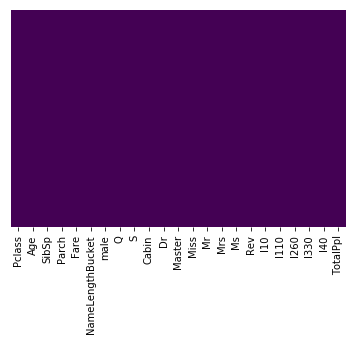

In [50]:
sns.heatmap(titanicTestCleaned.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Make sure we haven't lost any rows

In [51]:
print(titanicTestCleaned.shape)

(418, 23)


Now we predict. Below, we use the optimised Logistic Regression, lg2, to predict the response variable in the test data.

In [52]:
# lg2 was already fitted above. Now we use it to predict
predictions = lg2.predict(titanicTestCleaned)

# Convert it to a dataframe
df_pred = pd.DataFrame(predictions,columns=['Survived'])
df_pred.head()

,Survived
0,0
1,0
2,0
3,0
4,1


We need the data to be in the correct format. Namely, (PassengerId,Survived). So below, we create a function to format the predictions.

In [53]:
# def formatTitanicPredictions(df_pred,test):
#     '''
#     A function to format the predictions
#     df_pred:= the predictions dataframe
#     test:= the original test dataframe
#     '''
#     df_FullPred = pd.concat([df_pred,test],axis=1)
#     df_FullPred = df_FullPred.dropna()
#     df_FullPred['PassengerId'] = df_FullPred['PassengerId'].astype(int)
#     df_FullPred = df_FullPred.set_index('PassengerId')
#     return df_FullPred

In [54]:
def formatTitanicPredictions2(df_pred,test,original):
    '''
    A function to format the predictions
    df_pred:= the predictions dataframe without the PassengerIds
    test:= the original test dataframe where the PassengerIds still exist
    '''
    df_FullPred = pd.concat([df_pred,test],axis=1)
    df_FullPred = df_FullPred.dropna()
    df_FullPred['PassengerId'] = original['PassengerId'].astype(int)
    df_FullPred = df_FullPred.set_index('PassengerId')
    return df_FullPred

We can now format the predictions into a format where the index is PassengerId (so that when wwe save to csv that's the index) and we get another column which is Survived.

In [55]:
df_FullPred = formatTitanicPredictions2(df_pred,titanicTestCleaned,test)

df_FullPred['Survived'].head()

PassengerId
892    0
893    0
894    0
895    0
896    1
Name: Survived, dtype: int64

Below, we make sure there aren't any null information

In [56]:
df_FullPred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 24 columns):
Survived            418 non-null int64
Pclass              418 non-null int64
Age                 418 non-null int64
SibSp               418 non-null int64
Parch               418 non-null int64
Fare                418 non-null int64
NameLengthBucket    418 non-null int64
male                418 non-null uint8
Q                   418 non-null uint8
S                   418 non-null uint8
Cabin               418 non-null bool
Dr                  418 non-null uint8
Master              418 non-null uint8
Miss                418 non-null uint8
Mr                  418 non-null uint8
Mrs                 418 non-null uint8
Ms                  418 non-null uint8
Rev                 418 non-null uint8
l10                 418 non-null uint8
l110                418 non-null uint8
l260                418 non-null uint8
l330                418 non-null uint8
l40                 418 non-null ui

We now save the resulting predictions to a file

In [57]:
df_FullPred['Survived'].to_csv('GenderPrediction.csv',header=True)
df_FullPred.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,S,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7,10,1,1,0,...,1,0,0,0,0,0,0,0,0,0
893,0,3,47,1,0,7,30,0,0,1,...,0,1,0,0,0,0,0,0,0,1
894,0,2,62,0,0,9,20,1,1,0,...,1,0,0,0,0,0,1,0,0,0
895,0,3,27,0,0,8,10,1,0,1,...,1,0,0,0,0,0,0,1,0,0
896,1,3,22,1,1,12,40,0,0,1,...,0,1,0,0,0,0,0,0,0,2


Now let's summarise the above actions to predict and save all in one.

In [58]:
# def PredictAndSave(df,lg,path):
#     test = df
#     titanicTestCleaned = fillTitanicNa(test,True,True)
#     predictions = lg.predict(titanicTestCleaned)
#     df_pred = pd.DataFrame(predictions,columns=['Survived'])
#     df_FullPred = formatTitanicPredictions(df_pred,titanicTestCleaned)
#     df_FullPred['Survived'].to_csv(path,header=True)
#     return df_FullPred

In [59]:
def PredictAndSave2(df,traindata,lg,path,original):
    test = df
    titanicTestCleaned = fillTitanicNa(test,traindata,True,True)
    predictions = lg.predict(titanicTestCleaned)
    df_pred = pd.DataFrame(predictions,columns=['Survived'])
    df_FullPred = formatTitanicPredictions2(df_pred,titanicTestCleaned,original)
    df_FullPred['Survived'].to_csv(path,header=True)
    return df_FullPred

Now that we have a function to do the cleaning and formating, we can train a linear regression model and pass it to the function

In [60]:
# lg2 was already trained, we use it here in the function to do the prediction
PredictAndSave2(test2,titanicTrain.copy(),lg2,'GenderPrediction_LogisticRegression.csv',test).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,S,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7,10,1,1,0,...,1,0,0,0,0,0,0,0,0,0
893,0,3,47,1,0,7,30,0,0,1,...,0,1,0,0,0,0,0,0,0,1
894,0,2,62,0,0,9,20,1,1,0,...,1,0,0,0,0,0,1,0,0,0
895,0,3,27,0,0,8,10,1,0,1,...,1,0,0,0,0,0,0,1,0,0
896,1,3,22,1,1,12,40,0,0,1,...,0,1,0,0,0,0,0,0,0,2


### B- Decision Tree

Sometimes Tree Methods perform better. We can follow the steps above to optimise, train and test

In [61]:
# Import the classifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
# As before, we specify some of the parameters we want to iterate through
param_grid = {'criterion':['gini','entropy']}

# We use GridSearchCV as before
dtree_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=500, refit=True, verbose=1)
dtree_search.fit(X,y)
dtree_search.best_estimator_

Fitting 500 folds for each of 2 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.1s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
# Default classifier
dtree1 = DecisionTreeClassifier()

# Optimised classifier
dtree2 = dtree_search.best_estimator_

# Here we run cross validation for the default model and the optimised model. We run it 200 times
# with a randomised train and test set and get the mean accuracy score
dtree1_scores = cross_val_score(dtree1, X, y, cv=500, scoring='accuracy')
dtree2_scores = cross_val_score(dtree2, X, y, cv=500, scoring='accuracy')
print('The default classifier mean accuracy score is {}'.format(dtree1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(dtree2_scores.mean()))

The default classifier mean accuracy score is 0.8016666666666666
The optimised classifier mean accuracy score is 0.8043333333333332


In [64]:
# Fit the model
dtree2.fit(X, y)

# Predict and save
PredictAndSave2(test2,titanicTrain.copy(),dtree2,'GenderPrediction_MLA_DecisionTree.csv',test).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,S,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7,10,1,1,0,...,1,0,0,0,0,0,0,0,0,0
893,0,3,47,1,0,7,30,0,0,1,...,0,1,0,0,0,0,0,0,0,1
894,0,2,62,0,0,9,20,1,1,0,...,1,0,0,0,0,0,1,0,0,0
895,0,3,27,0,0,8,10,1,0,1,...,1,0,0,0,0,0,0,1,0,0
896,1,3,22,1,1,12,40,0,0,1,...,0,1,0,0,0,0,0,0,0,2


Our Decision tree did not do as well as the logistic regression as can be seen from the mean scores above. However, we can try Random Forest to see if decision trees can be optimised.

### C- Random Forest

In [65]:
# Import the classifier
from sklearn.ensemble import RandomForestClassifier

We run through the same steps as before

In [66]:
rforest = RandomForestClassifier()
param_grid = {'n_estimators':range(10,400,20)}
rforest_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=50, refit=True, verbose=1,n_jobs=4)
rforest_search.fit(X,y)
print(rforest_search.best_estimator_)

# Default classifier
rforest1 = RandomForestClassifier()

# Optimised classifier
rforest2 = rforest_search.best_estimator_

rforest1_scores = cross_val_score(rforest1, X, y, cv=200, scoring='accuracy',n_jobs=4)
rforest2_scores = cross_val_score(rforest2, X, y, cv=200, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(rforest1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(rforest2_scores.mean()))

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 350 tasks      | elapsed:   22.9s
[Parallel(n_jobs=4)]: Done 600 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 950 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  2.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
The default classifier mean accuracy score is 0.8235833333333332
The optimised classifier mean accuracy score is 0.821


This is a little better than Logistic Regression. Additionally, Random Forest gets much better at prediction as the sample size increases. And so, if we include the remaining data into the prediction, it may outshine logistic regression

In [67]:
rforest2.fit(X,y)
PredictAndSave2(test2,titanicTrain.copy(),rforest2,'GenderPrediction_MLA_RandomForest.csv',test).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,S,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7,10,1,1,0,...,1,0,0,0,0,0,0,0,0,0
893,1,3,47,1,0,7,30,0,0,1,...,0,1,0,0,0,0,0,0,0,1
894,0,2,62,0,0,9,20,1,1,0,...,1,0,0,0,0,0,1,0,0,0
895,0,3,27,0,0,8,10,1,0,1,...,1,0,0,0,0,0,0,1,0,0
896,1,3,22,1,1,12,40,0,0,1,...,0,1,0,0,0,0,0,0,0,2


### D- Linear Support Vector Machines

In [68]:
from sklearn.svm import LinearSVC
import time

In [69]:
lsvc = LinearSVC()
param_grid = {'dual':[True,False], 'tol':[0.00001,0.001,0.0005,0.0001,0.00005]}
lsvc_search = GridSearchCV(LinearSVC(), param_grid, cv=400, refit=True, verbose=1,n_jobs=10)
lsvc_search.fit(X,y)
print(lsvc_search.best_estimator_)

Fitting 400 folds for each of 10 candidates, totalling 4000 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   11.8s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   18.2s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   27.3s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:   38.8s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:   52.9s
[Parallel(n_jobs=10)]: Done 3584 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 4000 out of 4000 | elapsed:  1.1min finished


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
     verbose=0)


In [70]:
t0 = time.time()

# Default classifier
lsvc1 = LinearSVC(dual = False)

# Optimised classifier
lsvc2 = lsvc_search.best_estimator_

lsvc1_scores = cross_val_score(lsvc1, X, y, cv=300, scoring='accuracy')
lsvc2_scores = cross_val_score(lsvc2, X, y, cv=300, scoring='accuracy')
print('The default classifier mean accuracy score is {}'.format(lsvc1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(lsvc2_scores.mean()))

print ('The process took {} seconds'.format(time.time() - t0))

The default classifier mean accuracy score is 0.8352777777777778
The optimised classifier mean accuracy score is 0.8352777777777778
The process took 5.991267919540405 seconds


In [71]:
lsvc2.fit(X,y)
PredictAndSave2(test2,titanicTrain.copy(),lsvc2,'GenderPrediction_MLA_LinearSVC.csv',test).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,S,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7,10,1,1,0,...,1,0,0,0,0,0,0,0,0,0
893,1,3,47,1,0,7,30,0,0,1,...,0,1,0,0,0,0,0,0,0,1
894,0,2,62,0,0,9,20,1,1,0,...,1,0,0,0,0,0,1,0,0,0
895,0,3,27,0,0,8,10,1,0,1,...,1,0,0,0,0,0,0,1,0,0
896,1,3,22,1,1,12,40,0,0,1,...,0,1,0,0,0,0,0,0,0,2


### D- KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':range(1,20,5), 'weights':['uniform','distance'], \
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], \
               'p':range(1,5,1)}
knn_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=40, refit=True, verbose=1,n_jobs=4)
knn_search.fit(X,y)
knn_search.best_estimator_

Fitting 40 folds for each of 128 candidates, totalling 5120 fits


[Parallel(n_jobs=4)]: Done 110 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 1570 tasks      | elapsed:   33.2s
[Parallel(n_jobs=4)]: Done 2105 tasks      | elapsed:   56.5s
[Parallel(n_jobs=4)]: Done 3500 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 4805 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 5120 out of 5120 | elapsed:  3.1min finished


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=1,
           weights='uniform')

In [74]:
t0 = time.time()

# Default classifier
knn1 = KNeighborsClassifier()

# Optimised classifier
knn2 = knn_search.best_estimator_

knn1_scores = cross_val_score(knn1, X, y, cv=400, scoring='accuracy',n_jobs=4)
knn2_scores = cross_val_score(knn2, X, y, cv=400, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(knn1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(knn2_scores.mean()))

print ('The process took {} seconds'.format(time.time() - t0))

The default classifier mean accuracy score is 0.7508333333333332
The optimised classifier mean accuracy score is 0.7870833333333332
The process took 10.63798999786377 seconds


In [75]:
knn2.fit(X,y)
PredictAndSave2(test2,titanicTrain.copy(),knn2,'GenderPrediction_MLA_KNN.csv',test).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,NameLengthBucket,male,Q,S,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7,10,1,1,0,...,1,0,0,0,0,0,0,0,0,0
893,0,3,47,1,0,7,30,0,0,1,...,0,1,0,0,0,0,0,0,0,1
894,0,2,62,0,0,9,20,1,1,0,...,1,0,0,0,0,0,1,0,0,0
895,0,3,27,0,0,8,10,1,0,1,...,1,0,0,0,0,0,0,1,0,0
896,1,3,22,1,1,12,40,0,0,1,...,0,1,0,0,0,0,0,0,0,2


### F- Extra Trees Classifier

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

In [77]:
t0 = time.time()

etc = ExtraTreesClassifier()
param_grid = {'n_estimators':range(1,40,4), 'criterion':['gini','entropy']}
etc_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=400, refit=True, verbose=1,n_jobs=4)
etc_search.fit(X,y)
print(etc_search.best_estimator_)

# Default classifier
etc1 = ExtraTreesClassifier()

# Optimised classifier
etc2 = etc_search.best_estimator_

etc1_scores = cross_val_score(etc1, X, y, cv=200, scoring='accuracy',n_jobs=4)
etc2_scores = cross_val_score(etc2, X, y, cv=200, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(etc1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(etc2_scores.mean()))

etc2.fit(X,y)
PredictAndSave2(test2,titanicTrain.copy(),etc2,'GenderPrediction_MLA_ExtraTrees.csv',test).head()

print ('The process took {} seconds'.format(time.time() - t0))

Fitting 400 folds for each of 20 candidates, totalling 8000 fits


[Parallel(n_jobs=4)]: Done 134 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 2488 tasks      | elapsed:   31.5s
[Parallel(n_jobs=4)]: Done 3984 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 7494 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 8000 out of 8000 | elapsed:  2.4min finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
The default classifier mean accuracy score is 0.8121666666666666
The optimised classifier mean accuracy score is 0.8120833333333333
The process took 154.901869058609 seconds


### G- Many Classifiers

In [78]:
import sklearn as skl
from sklearn import gaussian_process
from xgboost import XGBClassifier

In [79]:
X = titanicCleaned.drop(['Survived','PassengerId'],axis=1)
y = titanicCleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [80]:
test = pd.read_csv('test.csv')
test2 = test.drop(['PassengerId'],axis=1)

In [81]:
ML = [
    skl.ensemble.ExtraTreesClassifier(),
    skl.ensemble.BaggingClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    XGBClassifier()
]

In [82]:
t0 = time.time()

for alg in ML:
    name = alg.__class__.__name__
    print()
    print()
    print(name)
    alg.fit(X_train,y_train)
    y_pred = alg.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    alg.fit(X,y)
    a= PredictAndSave2(test2,titanicTrain.copy(),alg,'GenderPrediction_MLA_{}.csv'.format(name),test)
    
print ('The process took {} seconds'.format(time.time() - t0))



ExtraTreesClassifier
[[143  15]
 [ 31  79]]
             precision    recall  f1-score   support

          0       0.82      0.91      0.86       158
          1       0.84      0.72      0.77       110

avg / total       0.83      0.83      0.83       268

0.8283582089552238


BaggingClassifier
[[137  21]
 [ 28  82]]
             precision    recall  f1-score   support

          0       0.83      0.87      0.85       158
          1       0.80      0.75      0.77       110

avg / total       0.82      0.82      0.82       268

0.8171641791044776


GaussianProcessClassifier
[[125  33]
 [ 47  63]]
             precision    recall  f1-score   support

          0       0.73      0.79      0.76       158
          1       0.66      0.57      0.61       110

avg / total       0.70      0.70      0.70       268

0.7014925373134329


XGBClassifier
[[145  13]
 [ 26  84]]
             precision    recall  f1-score   support

          0       0.85      0.92      0.88       158
          1 

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The process took 3.4763011932373047 seconds


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Let's optimise the XGBClassifier

In [83]:
t0 = time.time()

#xgb = XGBClassifier()

param_grid = {'n_estimators':[90], 'max_depth':range(6,9,1),\
              'booster':['gbtree'],'gamma': np.arange(0,1,0.2), 'learning_rate': [0.05,0.1,0.15, 0.2,0.25, 0.3]}
xgb_search = GridSearchCV(XGBClassifier(), param_grid, cv=100, refit=True, verbose=1,n_jobs=4)
xgb_search.fit(X,y)
print(xgb_search.best_estimator_)

# Default classifier
xgb1 = XGBClassifier()

# Optimised classifier
xgb2 = xgb_search.best_estimator_

xgb1_scores = cross_val_score(xgb1, X, y, cv=200, scoring='accuracy',n_jobs=4)
xgb2_scores = cross_val_score(xgb2, X, y, cv=200, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(xgb1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(xgb2_scores.mean()))

xgb2.fit(X,y)
PredictAndSave2(test2,titanicTrain.copy(),xgb2,'GenderPrediction_MLA_XGBOptimised.csv',test).head()

print ('The process took {} seconds'.format(time.time() - t0))

Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   33.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   58.6s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done 9000 out of 9000 | elapsed: 10.5min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=90,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
The default classifier mean accuracy score is 0.8215
The optimised classifier mean accuracy score is 0.8423333333333334
The process took 658.2988584041595 seconds


C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [84]:
xgb2_scores.mean()

0.8423333333333334

In [85]:
from sklearn.svm import SVC

In [86]:
t0 = time.time()

#svc = SVC()

param_grid = {'C': [0.1,10, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
SVC_search = GridSearchCV(SVC(), param_grid, cv=100, refit=True, verbose=1,n_jobs=4)
SVC_search.fit(X,y)
print(xgb_search.best_estimator_)

# Default classifier
SVC1 = SVC()

# Optimised classifier
SVC2 = SVC_search.best_estimator_

SVC1_scores = cross_val_score(SVC1, X, y, cv=200, scoring='accuracy',n_jobs=4)
SVC2_scores = cross_val_score(SVC2, X, y, cv=200, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(SVC1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(SVC2_scores.mean()))

SVC2.fit(X,y)
PredictAndSave2(test2,titanicTrain.copy(),SVC2,'GenderPrediction_MLA_SVCOptimised.csv',test).head()

print ('The process took {} seconds'.format(time.time() - t0))

Fitting 100 folds for each of 20 candidates, totalling 2000 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 660 tasks      | elapsed:   24.9s
[Parallel(n_jobs=4)]: Done 1343 tasks      | elapsed:   57.1s
[Parallel(n_jobs=4)]: Done 1793 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:  3.0min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=90,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
The default classifier mean accuracy score is 0.7497499999999999
The optimised classifier mean accuracy score is 0.8256666666666667
The process took 202.210675239563 seconds


In [89]:
names=['Logistic Regression','Decision Tree','Random Forest','Linear SVC','KNN','Extra Trees','Extreme Gradient Boost','SVC']
values=[lg2_scores.mean(),dtree2_scores.mean(),rforest2_scores.mean(),lsvc2_scores.mean(),knn2_scores.mean(),\
       etc2_scores.mean(),xgb2_scores.mean(),SVC2_scores.mean()]

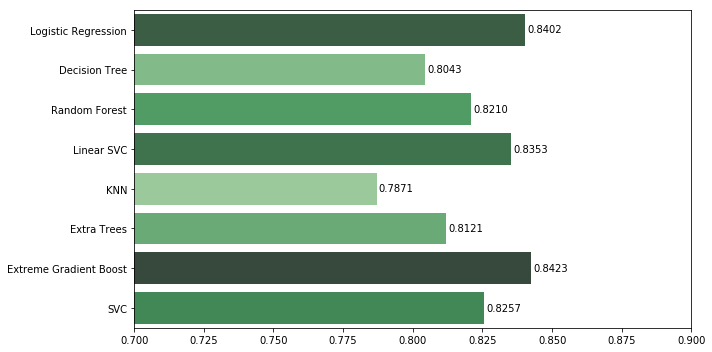

In [90]:
# Get the figure and axis
fig,ax = plt.subplots()

# Set the size of the figure
fig.set_size_inches(10,5)

# Here we define the palette. seaborn defines the palette by dividing 
# the palette region into len(values) evenly spaced green RGB values
pal = sns.color_palette("Greens_d", len(values))

# We want the smallest value to select the smallest green value in pal.
# i.e. we want the smallest value to pick 0 and the largest value to pick 7
# Here, we sort the values using arsort(). This gives us the indices in values
# increasing order. E.g. [1.2,1.3,1.1,2].argsort() gives us [2,0,1,3] since 
# index 2 is the smallest and index 0 is the next largest etc...
# Then if we argsort() this again we get [1,2,0,3]. This is basically saying than
# 1.2 is the second smallest, 1.3 is the 3rd smallest, 1.1 is the smallest and
# 2 is the 4th smallest (last). This is what we want.
rank = np.array(values).argsort().argsort()
g=sns.barplot(y=names,x=values,palette=np.array(pal[::-1])[rank])

ax.set_xlim(0.7,0.9)
for p in ax.patches:
    _x = p.get_x() + p.get_width()+0.007
    _y = p.get_y() + p.get_height()/1.7
    value = '{:.4f}'.format(p.get_width())
    ax.text(_x, _y, value, ha="center") 
plt.tight_layout()

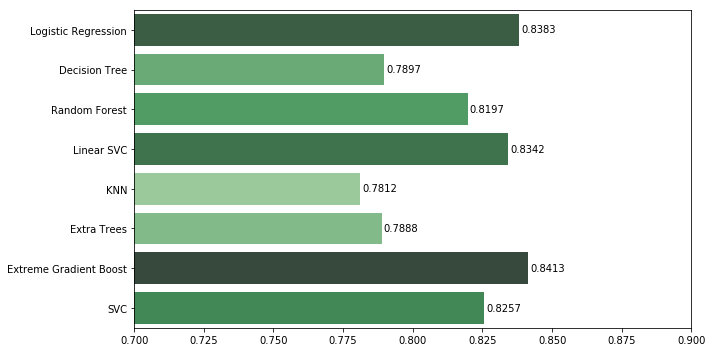

In [91]:
# Get the figure and axis
fig,ax = plt.subplots()

# Set the size of the figure
fig.set_size_inches(10,5)

# Here we define the palette. seaborn defines the palette by dividing 
# the palette region into len(values) evenly spaced green RGB values
pal = sns.color_palette("Greens_d", len(values))

# We want the smallest value to select the smallest green value in pal.
# i.e. we want the smallest value to pick 0 and the largest value to pick 7
# Here, we sort the values using arsort(). This gives us the indices in values
# increasing order. E.g. [1.2,1.3,1.1,2].argsort() gives us [2,0,1,3] since 
# index 2 is the smallest and index 0 is the next largest etc...
# Then if we argsort() this again we get [1,2,0,3]. This is basically saying than
# 1.2 is the second smallest, 1.3 is the 3rd smallest, 1.1 is the smallest and
# 2 is the 4th smallest (last). This is what we want.
rank = np.array(values).argsort().argsort()
g=sns.barplot(y=names,x=values,palette=np.array(pal[::-1])[rank])

ax.set_xlim(0.7,0.9)
for p in ax.patches:
    _x = p.get_x() + p.get_width()+0.007
    _y = p.get_y() + p.get_height()/1.7
    value = '{:.4f}'.format(p.get_width())
    ax.text(_x, _y, value, ha="center") 
plt.tight_layout()